In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import subprocess

%matplotlib inline

In [308]:
o = 2
xs = -o
xe = o
ys = -o
ye = o
xtics = 11
ytics = 11
num_p = 4001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [309]:
xn = np.zeros_like(x)
yn = np.zeros_like(y)
z = np.zeros_like(x)
iters = np.ones(x.shape)*np.inf
num_iter = 100
limit = 2

for i in range(1, num_iter+2):
    xn = xn**2 - yn**2 + x
    yn = 2*xn*yn + y
    z = xn + yn*1j
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-309-64f9bd7371cd>:14: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-309-64f9bd7371cd>:10: RuntimeWarning: overflow encountered in multiply
  yn = 2*xn*yn + y
<ipython-input-309-64f9bd7371cd>:11: RuntimeWarning: invalid value encountered in multiply
  z = xn + yn*1j
<ipython-input-309-64f9bd7371cd>:9: RuntimeWarning: overflow encountered in square
  xn = xn**2 - yn**2 + x
<ipython-input-309-64f9bd7371cd>:9: RuntimeWarning: invalid value encountered in subtract
  xn = xn**2 - yn**2 + x
<ipython-input-309-64f9bd7371cd>:10: RuntimeWarning: invalid value encountered in multiply
  yn = 2*xn*yn + y


In [310]:
print(np.min(iters))
iters[iters == np.inf] = np.NINF
print(np.max(iters))
print(np.isnan(z[500][500]))
iters[iters == np.NINF] = np.max(iters)+1
print(np.abs(z[0][0])>2)

1.0
101.0
False
False


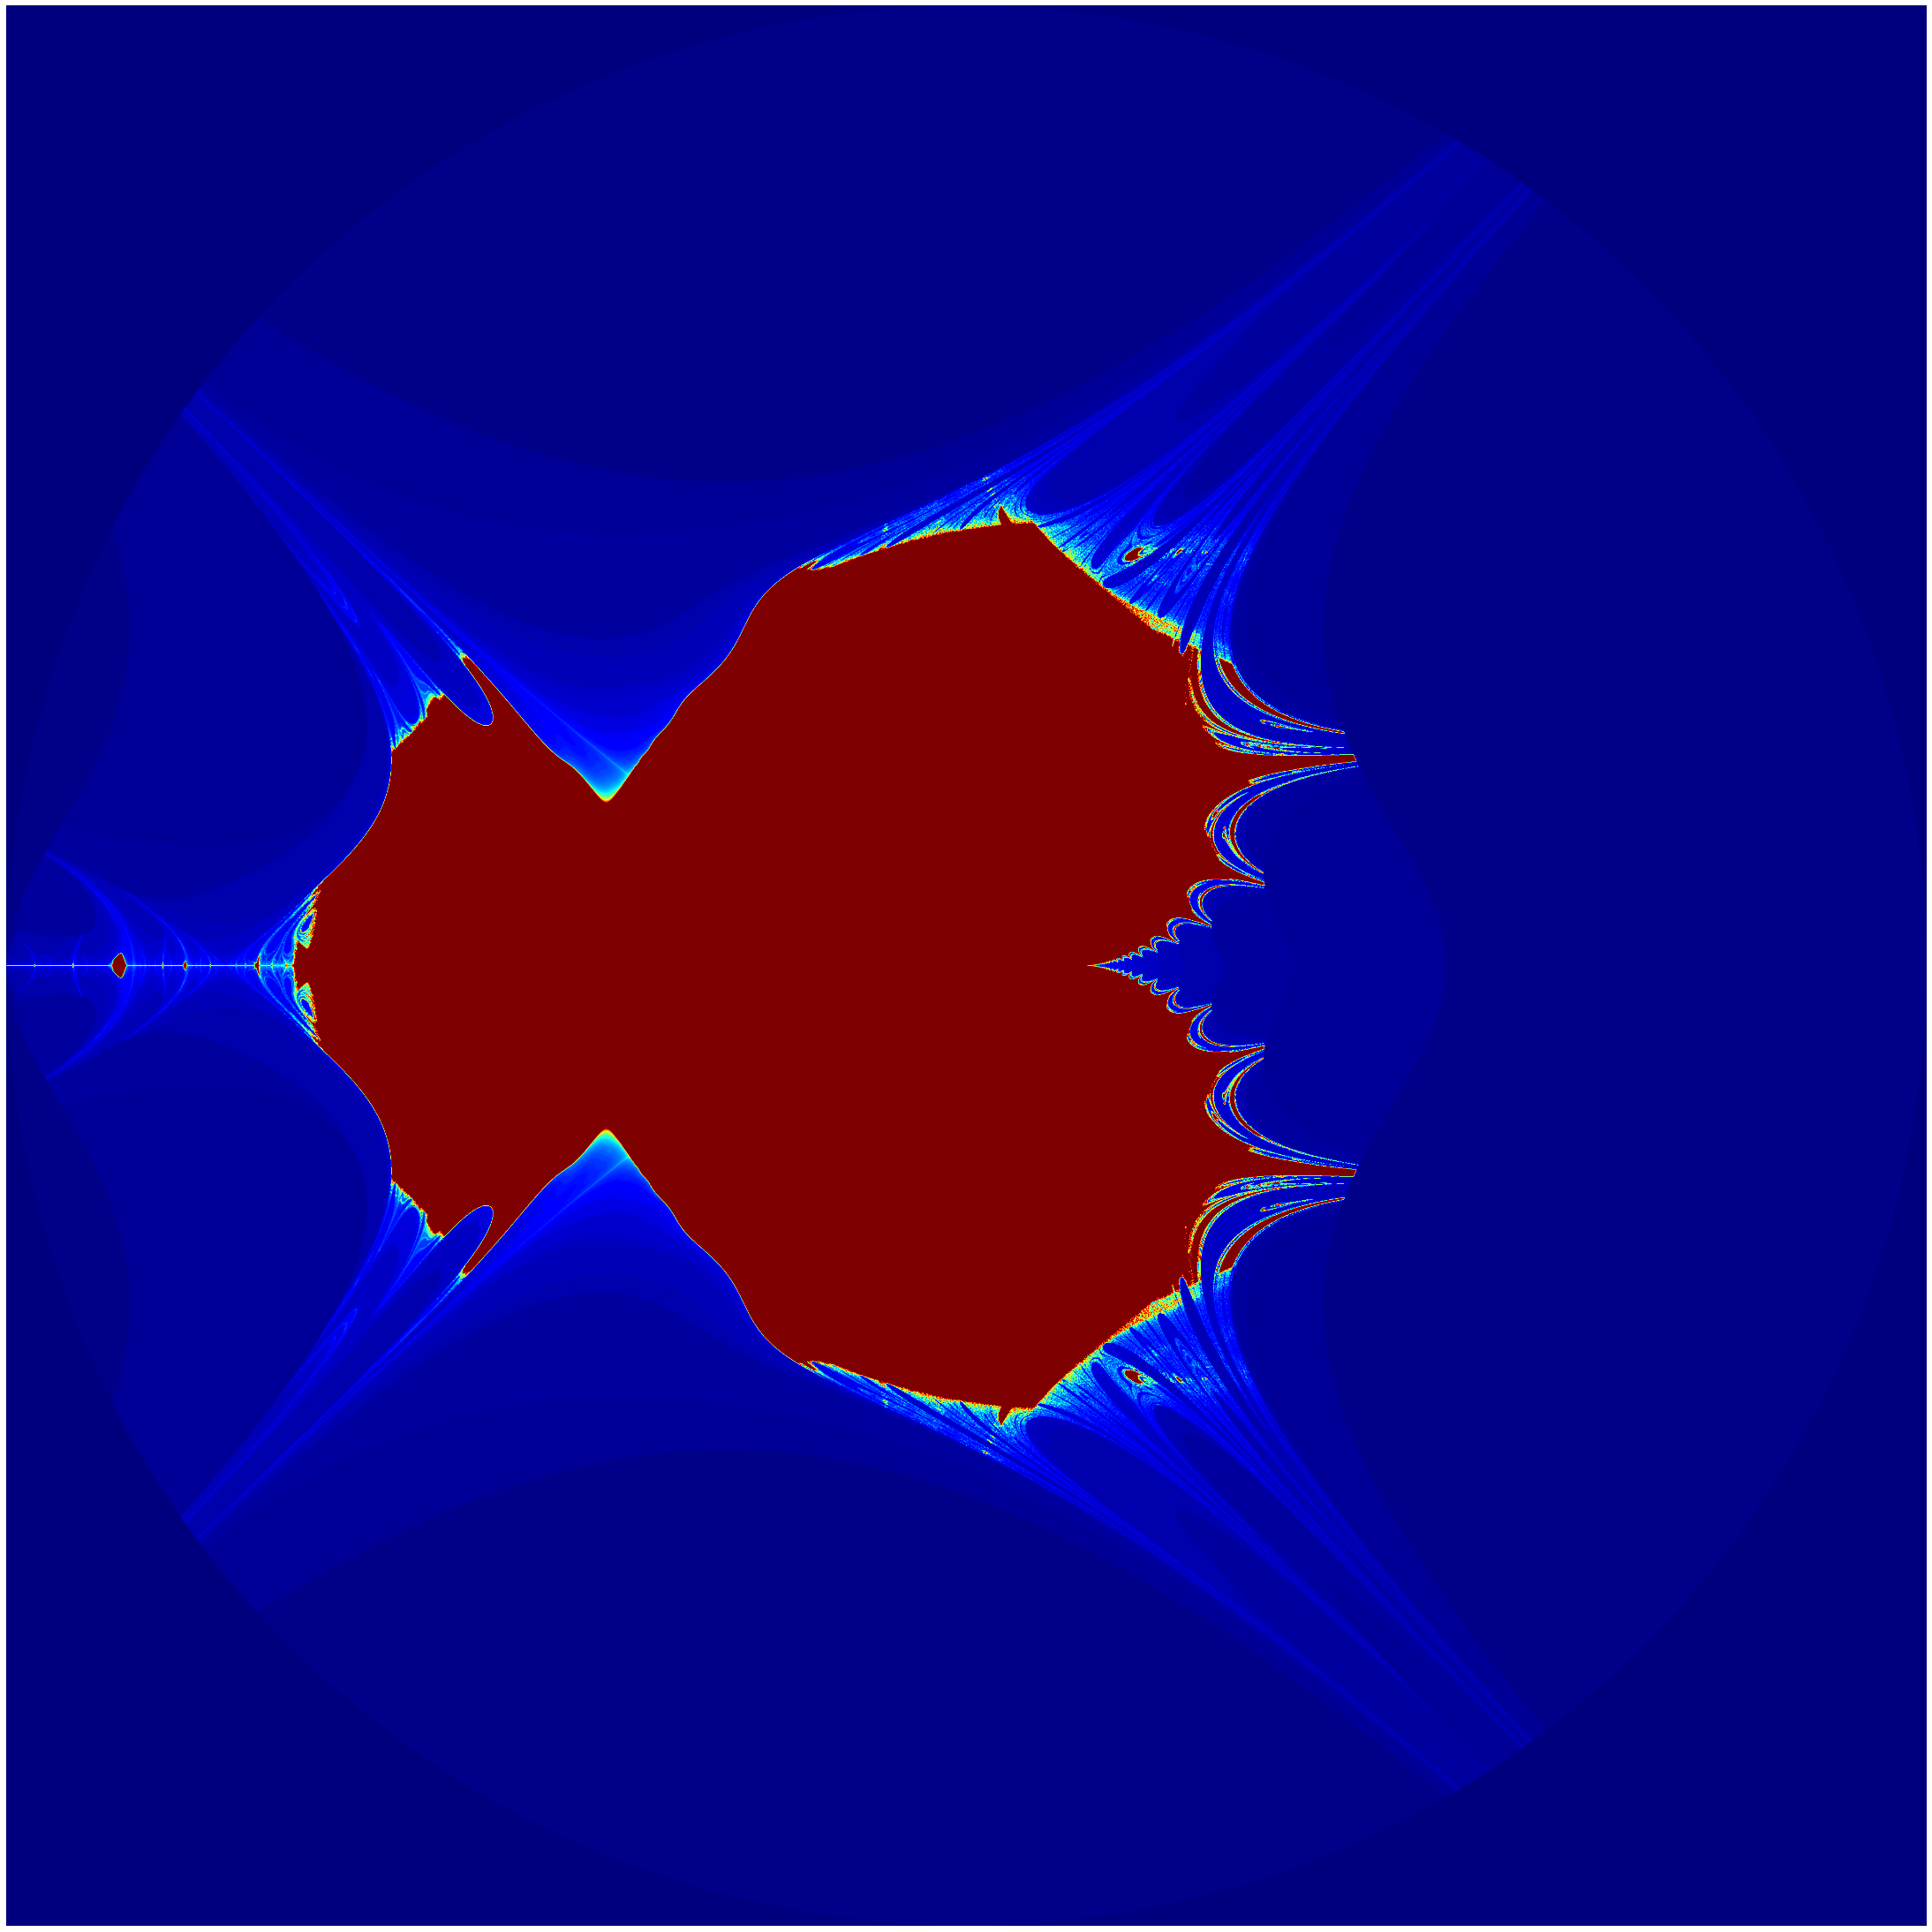

In [313]:
name = "tippetts_mandelbrot.png"

fig, ax = plt.subplots(figsize=(40, 40))
ax.imshow(iters,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()
plt.savefig("../images/"+name, bbox_inches='tight')

In [314]:
print(subprocess.check_output("cd ../sample_images && python3 reduce_size.py", shell=True, text=True))

saved image sierpinski_curve.jpeg
saved image triple_dragon.jpeg
saved image dragon_curve.jpeg
saved image sierpinski_triangle.jpeg
saved image newton_fractal.jpeg
saved image tippetts_mandelbrot.jpeg
saved image cesaro_curve.jpeg
saved image koch_antisnowflake.jpeg
saved image zubieta_julia.jpeg
saved image marek_dragon.jpeg
saved image levy_L_curve.jpeg
saved image buddhabrot.jpeg
saved image secant_sea.jpeg
saved image another_sierpinski_curve.jpeg
saved image peano_curve.jpeg
saved image sin_julia.jpeg
saved image koch_snowflake.jpeg
saved image sierpinski_carpet.jpeg
saved image twindragon_curve.jpeg
saved image mandelbrot.jpeg
saved image levy_standard_curve.jpeg
saved image koch_peano_curve.jpeg
saved image popcorn.jpeg
saved image logistic_map.jpeg
saved image tribrot.jpeg
saved image julia.jpeg
saved image cactus.jpeg
saved image hilbert_curve.jpeg

